In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import properties as prop
sns.set()
#sns.set_context("paper")
%matplotlib inline

In [2]:
splitnum = 1
meltype = 1
if meltype == 1:
    olap = 0.4
    nu = 'n015'
else:
    olap = 0.5
    nu = 'n005'

outdir = prop.outputDir
melodiaDir = prop.melodiaOutput
annotationsRoot = prop.annotationsRoot

In [5]:
melodia_df = (pd.io.json.read_json("melodia_scores/melody%s/nu_%s_melody%s.json" % (meltype, nu, meltype))).transpose()
clf_df = pd.DataFrame.from_csv("%s/CC_exper_mell/splitnum_%s/olap_%s/all_mel_scores.csv" % (outdir, splitnum, olap))
diff_df = pd.DataFrame(columns=['OA melodia', 'OA clf', 'Diff'])
diff_df.loc[:, 'OA melodia'] = melodia_df.loc[clf_df.index, 'Overall Accuracy']
diff_df.loc[:, 'OA clf'] = clf_df['OA']
diff_df.loc[:, 'Diff'] = melodia_df.loc[clf_df.index, 'Overall Accuracy'] - clf_df['OA']

NameError: name 'melodia_df' is not defined

In [8]:
trackid='MusicDelta_CoolJazz'

In [35]:
def plota(trackid):
    clf_fpath = "%s/CC_exper_mell/splitnum_%s/olap_%s/melody_output/%s_pred.csv" % (outdir, splitnum, olap, trackid)
    melodia_fpath = "%s/%s_MIX_vamp_mtg-melodia_melodia_melody.csv" % (melodiaDir, trackid)
    annot_fpath = "%s/MELODY%s/%s_MELODY%s.csv" % (annotationsRoot, meltype, trackid, meltype)

    clf_dat = pd.read_csv(clf_fpath, header=None, index_col=None)
    clf_dat.columns = ['time', 'f0']
    melodia_dat = pd.read_csv(melodia_fpath, header=None, index_col=None)
    melodia_dat.columns = ['time', 'f0']
    melodia_dat.loc[melodia_dat['f0'] < 0,'f0'] = 0
    annot = pd.read_csv(annot_fpath, header=None, index_col=None)
    annot.columns = ['time', 'f0']
    ymin = 256
    ymax = 1024
    xlim = [48, 66]
    c1, c2 = sns.color_palette('deep', 2)

    ant = mp.Patch(color='k', label='Annotation: Melody %s' % meltype)
    clf = mp.Patch(color=c1, label='Classification Method')
    mda = mp.Patch(color=c2, label='Melodia')

#     plt.figure(figsize=(30,10))
#     fig = plt.figure(figsize=(15,10))
    fig = plt.figure()
    
    ax1 = plt.subplot(2,1,1)
    plt.semilogy(annot['time'], annot['f0'], 'ok', alpha=1, basey=2, markersize=5)
    plt.semilogy(clf_dat['time'], clf_dat['f0'], '.', color=c1, alpha=1, basey=2, markersize=3)
    ax1.set_ylim(ymin=ymin, ymax=ymax)
    plt.xlim(xlim)
    locs,labels = plt.yticks()
    plt.yticks(locs, map(lambda x: "%1.0f" % x, locs))
    plt.ylabel('Frequency (Hz)')
    plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')

    ax2 = plt.subplot(2,1,2)
    plt.semilogy(annot['time'], annot['f0'], 'ok', alpha=1, basey=2, markersize=5)
    plt.semilogy(melodia_dat['time'], melodia_dat['f0'], '.', color=c2, alpha=1, basey=2, markersize=3)
    ax2.set_ylim(ymin=ymin, ymax=ymax)
    plt.xlim(xlim)
    locs,labels = plt.yticks()
    plt.yticks(locs, map(lambda x: "%1.0f" % x, locs))
    plt.xlabel('Time (sec)')
    plt.ylabel('Frequency (Hz)')

    fig.legend(handles=[ant, clf, mda], labels=['Melody %s Annotation' % meltype,'Proposed Method','Melodia'], 
               loc=(0.125,0.52), ncol=3, columnspacing=1)
    plt.savefig('/Volumes/Dados/Google Drive/Estudos/Mestrado/workspace/python/contour_classification/mel%s_%s_comparison.eps' % (meltype, trackid), format='eps', bbox_inches='tight', pad_inches=0.0)

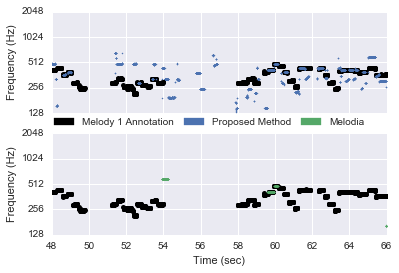

In [36]:
plota('MusicDelta_CoolJazz')

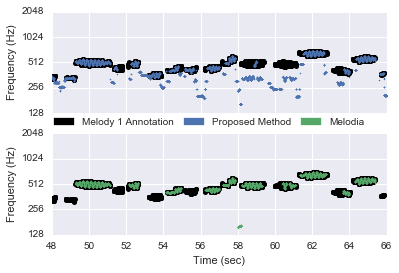

In [37]:
plota('Schumann_Mignon')

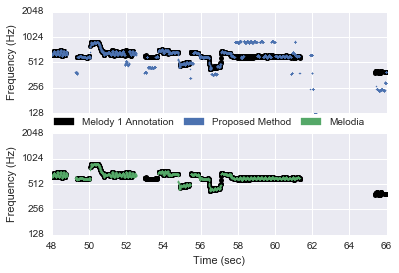

In [38]:
plota('Wolf_DieBekherte')

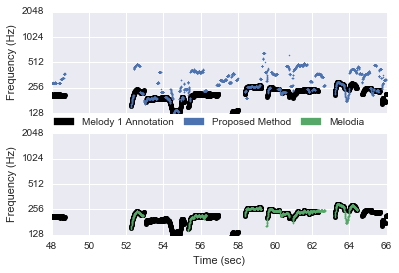

In [39]:
plota('MatthewEntwistle_DontYouEver')

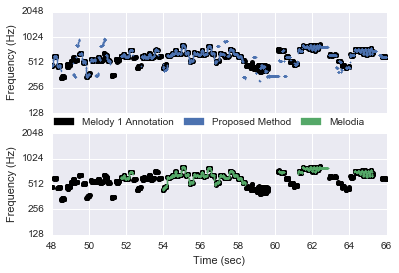

In [41]:
splitnum = 3
plota('Handel_TornamiAVagheggiar')